In [1]:
import os, sys
import glob
import pandas as pd
import numpy as np
import scipy.special
import operator

from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from bokeh.charts import Histogram, defaults, vplot, hplot, show, output_file

In [2]:
font = {'family' : 'monospace',
        'weight' : 'medium',
        'size'   : 18}

matplotlib.rc('font', **font)

# Cleaning Functions

In [3]:
import glob
def make_big_frame():
    """
    big_frame is every .csv file stacked on top of one another from the directory
    
    path = full file path
    
    it also prints if the columns were of equal length
    """
    
    # pull each csv into a list
    dfs = []
    #insert path here
    #put in fullpath to file, and filetype = csv, txt, etc.
    path = "/home/rafa/github/For Businesses/Infinite-Agency/SGK/*.csv" 
    count = 0
    for fname in glob.glob(path):
        count += 1
        print 'file number:{}'.format(count)
        dfs.append(pd.read_csv(fname))
    
    # creates a set of their column lengths
    shape_set = set([df.shape[1] for df in dfs])
    big_frame = pd.concat(dfs, ignore_index = True, axis = 0)
    
    if len(shape_set) > 1:
        print 'Unequal Columns!'
    else:
        print 'Columns are equal length :)\n Shape = {}'.format(big_frame.shape)
 
    big_frame.dropna(axis = 1, how = 'all', inplace=True)
    drop_nonunique(big_frame)
    return big_frame

In [4]:
def make_datelist(big_frame):
    datelist = []
    for column in big_frame.columns:
        if 'Date' in column:
            datelist.append(column)
    return datelist

In [5]:
def change_date(big_frame, datelist):
    datelist = []
    for column in datelist:
        big_frame[column] = pd.to_datetime(big_frame[column], infer_datetime_format=False)
    return big_frame

In [6]:
def drop_nonConversions(big_frame, datelist):
    for column in datelist:
        if column != 'ConversionDate':
            big_frame.drop(column, axis=1, inplace=True)

In [7]:
def drop_nonunique(big_frame):
    for column in big_frame.columns:
        if len(big_frame[column].unique()) == 1:
            big_frame.drop(column, axis=1, inplace=True)
    print big_frame.shape

# Create frame and add new columns
-------------------------------

In [9]:
big_frame = make_big_frame()
big_frame.shape
datelist = make_datelist(big_frame)
drop_nonConversions(big_frame, datelist)
big_frame = change_date(big_frame, datelist)
big_frame = change_date(big_frame, datelist)
big_frame.drop_duplicates(inplace = True, subset = ['ConversionID'])
big_frame.reset_index(inplace=True)
big_frame.shape

file number:1
file number:2
Columns are equal length :)
 Shape = (9, 4573)
(9, 216)


(9, 197)

In [10]:
time_list = []
for datetimes in big_frame['ConversionDate']:
    time_list.append(int(datetimes[11:13]))

In [11]:
path_lst = []
for column in big_frame.columns:
    if 'PlacementName/SearchKeywordName' in column:
        path_lst.append(column)

In [12]:
paths_by_name = []
for row in range(big_frame.shape[0]):
    path_name = []
    for item in range(len(path_lst)):
        path_name.append(big_frame.loc[row, path_lst[item]])
    
    
    paths_by_name.append(path_name)
    
for index, path in enumerate(paths_by_name):
    paths_by_name[index] = [node for node in path if isinstance(node, str)]

In [13]:
path_lengths = [len(path) for path in paths_by_name]
big_frame['path_lengths'] = path_lengths
big_frame['paths_by_adname'] = paths_by_name
big_frame['hour'] = time_list

In [18]:
big_frame

,index,UserID,ConversionID,ConversionDate,DeviceType,OperatingSystemType,BrowserType,State-Region,DMA,City,...,TargetAudienceName5,SiteVisitClassification5,SiteVisitReferralDomain5,Param1Name,Param1Value,Param2Name,param2Value,path_lengths,paths_by_adname,hour
0,0,1.579932e+12,4.637723e+11,2017-04-26 12:39:32.316,Tablet,iOS 10.2,Safari,South Carolina,Charlotte,Rock Hill,...,NaN,SEARCH,r.search.yahoo.com,NaN,NaN,NaN,NaN,3,"[Prospecting_Mobile_April_300x50, Prospecting_...",12
1,1,1.462052e+12,4.636078e+11,2017-04-26 04:14:09.511,Tablet,iOS 10.3,Safari,New York,New York,New York,...,Untargeted,NaN,NaN,NaN,NaN,NaN,NaN,5,"[Prospecting_Mobile_April_320x50, Prospecting_...",4
2,2,1.925382e+12,4.626716e+11,2017-04-22 23:21:19.490,PC,Windows 10,Chrome,Washington,Seattle-Tacoma,Mount Vernon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,[Prospecting_Display_April_300x250],23
3,3,1.462052e+12,4.637334e+11,2017-04-26 11:29:23.862,Tablet,iOS 10.3,Safari,New York,New York,New York,...,Untargeted,NaN,NaN,NaN,NaN,NaN,NaN,5,"[Prospecting_Mobile_April_320x50, Prospecting_...",11
4,4,1.959191e+12,4.680200e+11,2017-05-10 16:09:07.876,PC,Windows 10,Edge,Florida,Tampa-St. Pete (Sarasota),Oldsmar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,[Retargeting_Display_April_160x600],16
5,5,1.943884e+12,4.631622e+11,2017-04-24 13:38:11.442,PC,Windows 7,Chrome,Ohio,Toledo,Tiffin,...,NaN,NaN,NaN,secCall,1.0,tp_be,$$206998$$,2,"[Prospecting_Display_April_728x90, Prospecting...",13
6,6,1.417056e+12,4.672892e+11,2017-05-08 16:50:57.840,Smart Phone,Android 6.0,Chrome,Michigan,Detroit,Northville,...,NaN,NaN,NaN,secCall,1.0,tp_be,$$206998$$,1,[Prospecting_Mobile_ROC_PreRoll],16
7,7,1.463322e+12,4.673169e+11,2017-05-08 12:33:49.791,Smart Phone,iOS 10.3,Safari,Ohio,Dayton,Dayton,...,NaN,SEARCH,www.google.com,secCall,1.0,tp_be,$$206998$$,3,"[Prospecting_Mobile_May_320x50, Prospecting_Mo...",12
8,8,1.463322e+12,4.673169e+11,2017-05-08 16:28:33.105,Smart Phone,iOS 10.3,Safari,Ohio,Dayton,Dayton,...,Untargeted,NaN,NaN,secCall,1.0,tp_be,$$206998$$,3,"[Prospecting_Mobile_May_320x50, Prospecting_Mo...",16


# Make new frames

In [19]:
state_list = big_frame['State-Region'].unique()
new_frame = big_frame[['ConversionID','BrowserType', 'OperatingSystemType', 'DeviceType','path_lengths', 'paths_by_adname', 'State-Region', 'hour']]
smaller_frames = []
for states in state_list:
    smaller_frames.append(new_frame[new_frame['State-Region'] == states])

In [20]:
after_hours = new_frame[(new_frame['hour'] < 10) | (new_frame['hour'] > 22)].sort_values(by = ['path_lengths'])
during_hours = new_frame[(new_frame['hour'] > 10) & (new_frame['hour'] < 22)].sort_values(by = ['path_lengths'])

# Plot time of day histograms

In [21]:
new_frame['hour'].count()

9

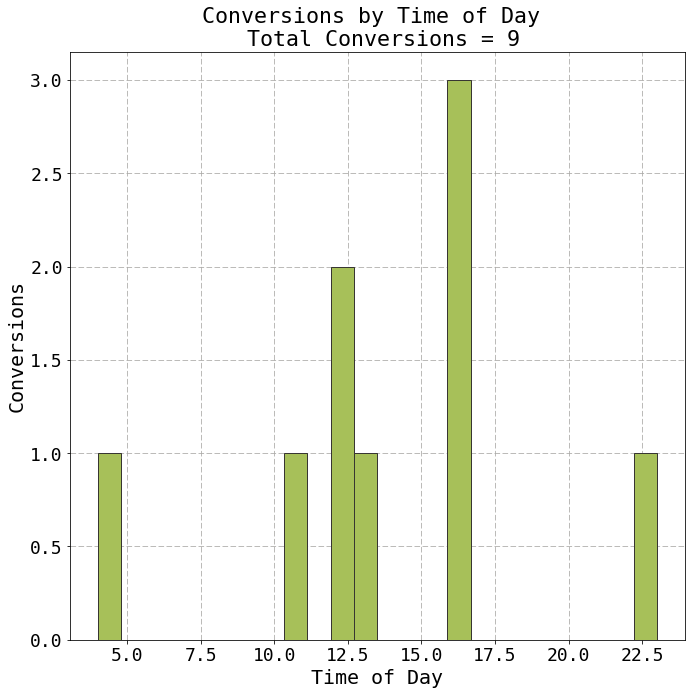

In [22]:
fonts = 20
f, (ax0) = plt.subplots(1, 1, figsize = (10, 10))

ax0.grid(zorder = 0, linestyle = 'dashed', color = '#acaaa8')
ax0.hist(new_frame['hour'], bins = 24, color = '#a7c059', zorder = 3, histtype='bar', ec='#383632')
ax0.set_title('Conversions by Time of Day \n Total Conversions = {}'.format(new_frame.shape[0]))
ax0.set_xlabel('Time of Day', fontsize = fonts)
ax0.set_ylabel('Conversions', fontsize = fonts)

# ax1.grid(zorder = 0, linestyle = 'dashed', color = '#acaaa8')
# ax1.hist(after_hours['hour'], bins = 24, color = '#a7c059', zorder = 3)
# ax1.set_title('Between 10 pm and 10 am\nTotal Conversions = {}'.format(after_hours.shape[0]))
# ax1.set_xlabel('Time of Day', fontsize = fonts)
# ax1.set_ylabel('Conversions', fontsize = fonts)


# ax2.grid(zorder = 0, linestyle = 'dashed', color = '#acaaa8')
# ax2.hist(during_hours['hour'], bins = 24, color = '#a7c059', zorder = 3)
# ax2.set_title('Between 10 pm and 10 am\n Total Conversions = {}'.format(during_hours.shape[0]))
# ax2.set_xlabel('Time of Day', fontsize = fonts)
# ax2.set_ylabel('Conversions', fontsize = fonts)

plt.tight_layout()
plt.show()

In [23]:
optimal = new_frame[new_frame['path_lengths'] < 6]
optimal = optimal.sort_values(by = 'path_lengths')

In [24]:
ad_list = []
for path_name in optimal['paths_by_adname']:
    for ad in path_name:
        if ad not in ad_list:
            ad_list.append(ad)

In [25]:
vals = [0] * len(ad_list)

In [26]:
ads = dict(zip(ad_list, vals))

In [27]:
for different_paths in optimal['paths_by_adname']:
    for ad in different_paths:
        ads[ad] += 1

In [28]:
ads = sorted(ads.items(), key = operator.itemgetter(1))[::-1]

In [29]:
xvalues = range(1, len(ads) + 1)
yvalues = [ad[1] for ad in ads]
names = [ad[0][12::] for ad in ads]

In [30]:
sums = []
for index in range(len(yvalues)):
    sums.append(sum(yvalues[0:index]))

In [31]:
disp_avg = sum([ad[1] for ad in ads])/float(len(ads))
disp_avg

3.4285714285714284

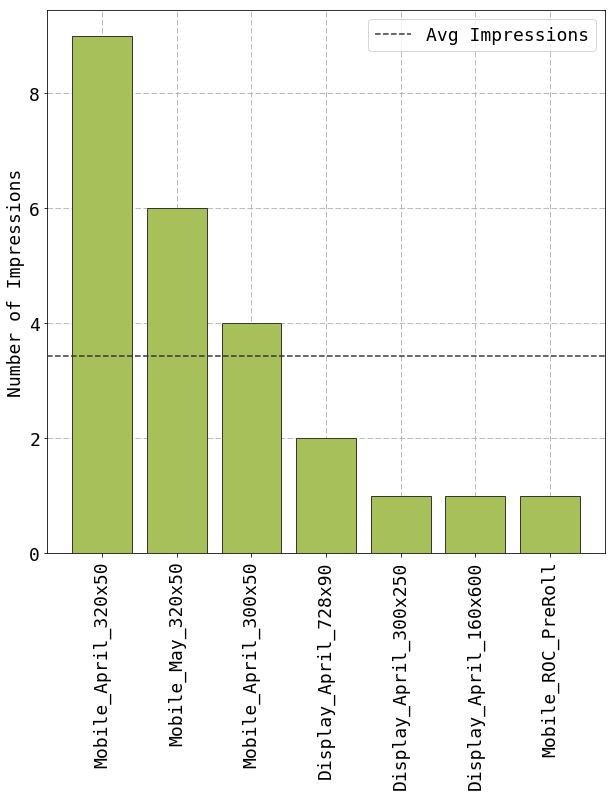

In [32]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.grid(zorder = 0, linestyle = 'dashed', color = '#acaaa8')


ax = plt.bar(xvalues, 
             yvalues,
             ec='#383632',
             color='#a7c059', 
             zorder = 3)

plt.axhline(y = disp_avg, 
            zorder = 3, 
            color = '#383632', 
            linestyle = 'dashed', 
            label = 'Avg Impressions')

plt.ylabel('Number of Impressions')
# plt.xlabel('Ad Type')

plt.xticks(xvalues, 
           names, 
           rotation = 90)


plt.legend()
plt.show()

In [33]:
big_frame['path_lengths'].mean()

2.6666666666666665

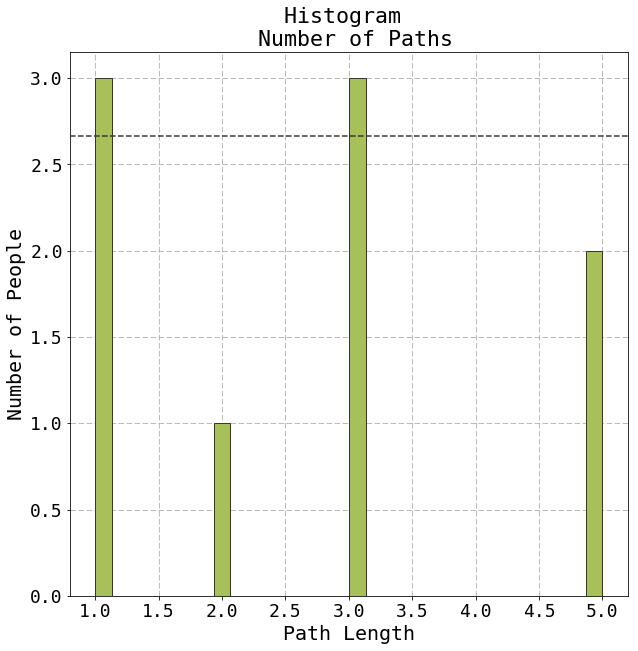

In [34]:
f, (ax0) = plt.subplots(1, 1, figsize = (10, 10))

ax0.grid(zorder = 0, linestyle = 'dashed', color = '#acaaa8')
ax0.hist(big_frame['path_lengths'], bins = 30, color = '#a7c059', zorder = 3, histtype='bar', ec='#383632')
ax0.set_title('Histogram \n Number of Paths')
ax0.set_xlabel('Path Length', fontsize = fonts)
ax0.set_ylabel('Number of People', fontsize = fonts)


plt.axhline(y = big_frame['path_lengths'].mean(), 
            zorder = 3, 
            color = '#383632', 
            linestyle = 'dashed', 
            label = 'Avg Path Length')

In [35]:
optimal.head()

,ConversionID,BrowserType,OperatingSystemType,DeviceType,path_lengths,paths_by_adname,State-Region,hour
2,4.626716e+11,Chrome,Windows 10,PC,1,[Prospecting_Display_April_300x250],Washington,23
4,4.680200e+11,Edge,Windows 10,PC,1,[Retargeting_Display_April_160x600],Florida,16
6,4.672892e+11,Chrome,Android 6.0,Smart Phone,1,[Prospecting_Mobile_ROC_PreRoll],Michigan,16
5,4.631622e+11,Chrome,Windows 7,PC,2,"[Prospecting_Display_April_728x90, Prospecting...",Ohio,13
0,4.637723e+11,Safari,iOS 10.2,Tablet,3,"[Prospecting_Mobile_April_300x50, Prospecting_...",South Carolina,12


In [36]:
optimal_list = []
for lengths in optimal['path_lengths'].unique():
    df = optimal[optimal['path_lengths'] == lengths]
    optimal_list.append(df)

In [37]:
optimal_list[4]

IndexError: list index out of range

In [38]:
count_paths = Counter()
for paths in optimal['paths_by_adname']:
    count_paths[str(paths)] += 1
    
count_paths = sorted(count_paths.items(), key = operator.itemgetter(1))[::-1]

In [39]:
for item in count_paths:
    print item 

("['Prospecting_Mobile_April_320x50', 'Prospecting_Mobile_April_320x50', 'Prospecting_Mobile_April_320x50', 'Prospecting_Mobile_April_300x50', 'Prospecting_Mobile_April_320x50']", 2)
("['Prospecting_Mobile_May_320x50', 'Prospecting_Mobile_May_320x50', 'Prospecting_Mobile_May_320x50']", 2)
("['Retargeting_Display_April_160x600']", 1)
("['Prospecting_Display_April_728x90', 'Prospecting_Display_April_728x90']", 1)
("['Prospecting_Mobile_April_300x50', 'Prospecting_Mobile_April_320x50', 'Prospecting_Mobile_April_300x50']", 1)
("['Prospecting_Mobile_ROC_PreRoll']", 1)
("['Prospecting_Display_April_300x250']", 1)


In [40]:
optimal

,ConversionID,BrowserType,OperatingSystemType,DeviceType,path_lengths,paths_by_adname,State-Region,hour
2,4.626716e+11,Chrome,Windows 10,PC,1,[Prospecting_Display_April_300x250],Washington,23
4,4.680200e+11,Edge,Windows 10,PC,1,[Retargeting_Display_April_160x600],Florida,16
6,4.672892e+11,Chrome,Android 6.0,Smart Phone,1,[Prospecting_Mobile_ROC_PreRoll],Michigan,16
5,4.631622e+11,Chrome,Windows 7,PC,2,"[Prospecting_Display_April_728x90, Prospecting...",Ohio,13
0,4.637723e+11,Safari,iOS 10.2,Tablet,3,"[Prospecting_Mobile_April_300x50, Prospecting_...",South Carolina,12
7,4.673169e+11,Safari,iOS 10.3,Smart Phone,3,"[Prospecting_Mobile_May_320x50, Prospecting_Mo...",Ohio,12
8,4.673169e+11,Safari,iOS 10.3,Smart Phone,3,"[Prospecting_Mobile_May_320x50, Prospecting_Mo...",Ohio,16
1,4.636078e+11,Safari,iOS 10.3,Tablet,5,"[Prospecting_Mobile_April_320x50, Prospecting_...",New York,4
3,4.637334e+11,Safari,iOS 10.3,Tablet,5,"[Prospecting_Mobile_April_320x50, Prospecting_...",New York,11
